## Data anylsis and vizualisation

In [2]:
import pandas as pd
df = pd.read_csv("data/songdata.zip")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [3]:
from nltk import word_tokenize

word_counts = list()
char_counts = list()
char_line_lengths = list()
word_line_lengths = list()
word_lengths = list()
number_of_lines = list()

for index, row in df.iterrows():
    song = row['text']

    words = word_tokenize(song)
    word_count = len(words)
    lines = song.replace("\n\n", "\n").split("\n")
    num_lines = len(lines)

    char_line_lengths.append(sum([len(line) for line in lines]) / num_lines)
    word_line_lengths.append(sum([len(word_tokenize(line)) for line in lines]) / num_lines)
    word_lengths.append(sum([len(word) for word in words]) / word_count)
    number_of_lines.append(num_lines)
    
    word_counts.append(word_count)
    char_counts.append(len(song))


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
palette = sns.color_palette("PuBuGn_d")
sns.set_style("darkgrid")

[Text(27.825000000000003, 0.5, 'Avg #Char/Word'),
 Text(0.5, 14.69999999999997, 'Song index')]

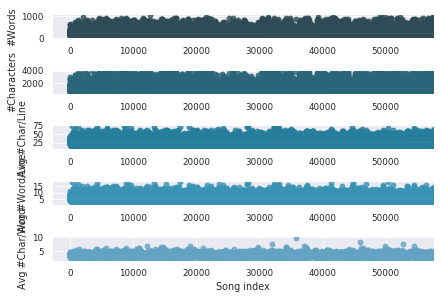

In [6]:
fig, axs = plt.subplots(nrows=5)
fig.tight_layout()
sns.regplot(range(len(word_counts)), word_counts, ax=axs[0], color=palette[0])
axs[0].set(ylabel='#Words')
sns.regplot(range(len(char_counts)), char_counts, ax=axs[1], color=palette[1])
axs[1].set(ylabel='#Characters')
sns.regplot(range(len(char_line_lengths)), char_line_lengths, ax=axs[2], color=palette[2])
axs[2].set(ylabel='Avg #Char/Line')
sns.regplot(range(len(word_line_lengths)), word_line_lengths, ax=axs[3], color=palette[3])
axs[3].set(ylabel='Avg #Word/Line')
sns.regplot(range(len(word_lengths)), word_lengths, ax=axs[4], color=palette[4])
axs[4].set(xlabel='Song index', ylabel='Avg #Char/Word')

--#tokens--
Min: 39
Max: 1061
Mean: 251.10723330442323
Std: 129.86666196026877
Median: 221.0
Mode: ModeResult(mode=array([168]), count=array([308]))

--#chars--
Min: 400
Max: 3997
Mean: 1179.504891587164
Std: 575.7000565037893
Median: 1052.0
Mode: ModeResult(mode=array([843]), count=array([79]))

--#char/line--
Min: 8.543478260869565
Max: 71.81818181818181
Mean: 28.548205875150966
Std: 7.319881872551672
Median: 27.333333333333332
Mode: ModeResult(mode=array([26.]), count=array([113]))

--#word/line--
Min: 1.5
Max: 18.09090909090909
Mean: 6.2833664400047065
Std: 1.7866282940371663
Median: 6.0
Mode: ModeResult(mode=array([6.]), count=array([392]))

--#char/word--
Min: 2.046153846153846
Max: 9.71111111111111
Mean: 3.5346449055355835
Std: 0.3453575093272253
Median: 3.5082872928176796
Mode: ModeResult(mode=array([3.5]), count=array([186]))



[Text(0.5, 14.69999999999997, 'Avg #Char/Word per Song')]

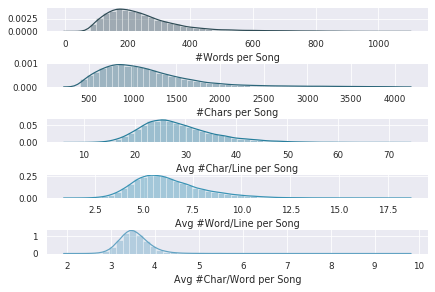

In [7]:
import numpy as np
from scipy import stats

data = [word_counts, char_counts, char_line_lengths, word_line_lengths, word_lengths]
names = ["#tokens", "#chars", "#char/line", "#word/line", "#char/word"]
for name, data in zip(names, data):
    print(f"--{name}--")
    print(f"Min: {np.min(data)}")
    print(f"Max: {np.max(data)}")
    print(f"Mean: {np.mean(data)}")
    print(f"Std: {np.std(data)}")
    print(f"Median: {np.median(data)}")
    print(f"Mode: {stats.mode(data)}")
    print("")

fig, axs = plt.subplots(nrows=5)
fig.tight_layout()
sns.distplot(word_counts, ax=axs[0], color=palette[0])
axs[0].set(xlabel='#Words per Song')
sns.distplot(char_counts, ax=axs[1], color=palette[1])
axs[1].set(xlabel='#Chars per Song')
sns.distplot(char_line_lengths, ax=axs[2], color=palette[2])
axs[2].set(xlabel='Avg #Char/Line per Song')
sns.distplot(word_line_lengths, ax=axs[3], color=palette[3])
axs[3].set(xlabel='Avg #Word/Line per Song')
sns.distplot(word_lengths, ax=axs[4], color=palette[4])
axs[4].set(xlabel='Avg #Char/Word per Song')

In [1]:
freqs = dict()
with open("data/sentences.txt", "r") as f:
    for line in f:
        for token in line.rstrip().split(" "):
            if token not in freqs:
                freqs[token] = 1
            else:
                freqs[token] += 1

In [7]:
from random import random
import math

total_words = len(freqs.keys())
threshold = 1e-6
discard = set()
for word in freqs:
    z = freqs[word] / total_words
    p = (math.sqrt(z / threshold) + 1) * (threshold / z)
    if random() <= p:
        discard.add(word)
print("Total words:", total_words)
print("Discarded words:", len(discard))
print("Result:", total_words - len(discard))
print(discard)

Total words: 97881
Discarded words: 26413
Result: 71468
{'geodude', 'finnaly', '1913', 'callio-trips', 'alahh', 'corpes', 'fing', "'etmol", 'miscellaneous', 'foolin', 'surfs', 'flunking', 'facku', 'alexandria', 'eyewitness', 'geechin', 'reprisal-', 'firefighter', 'underlie', 'freitag', 'a-do-re', 'synthesizers', '.hmmm', 'leaage', 'prakhay', "'scumbag", 'ceremonial', 'polls', 'openbar', 'skee', 'squab', 'faucets', 'wassail', 'flatty', 'stimmy', 'republicans', 'unyielding', 'runny-nosed', 'lowed', 'jahaan', 'lover..', 'zircon-encrusted', 'shmoe', 'paliwanag', 'grinders', 'hairlip', 'auditioning', 'ooooh-ooh', 'bo-los', 'ginja', 'practual', 'pyrotechnic', "k'var", 'shome', "s'marre", "there'snothing", 'oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh', 'eyn', 'kingsize', 'wawa', 'liberdad', 'cranges', 'dirty-3', 'permissionthe', 'homefolks', 'lya', 'know-it-', 'ardor', 'double-o-dooms', 'dang', 'bad-mouthed', 'walkwalla', 'peste', 'implosion', 'a-watching', 'hbk', 'swurvin', 'punitin', 'pgiisip', 'gr

In [4]:
import util
words = util.load_vocab("vocab_kaggle.pkl")

In [5]:
new_words = list(set(words).difference(discard))
print("Default words:", len(words))
print("Discarded words:", len(discard))
print("New words:", len(new_words))

Default words: 97881
Discarded words: 92220
New words: 5661


In [6]:
util.write_vocab("fixed_vocab.pkl", new_words)